# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Devin Branwen]
- **Email:** [DevinBranwen@students.amikom.ac.id]
- **ID Dicoding:** [devin21x]

## Menentukan Pertanyaan Bisnis

- Which product category has the highest sales volume? Do companies earn more profit from lower-priced or higher-priced products?
- What is the average customer expenditure? Does this average vary by geographical location?

## Import Semua Packages/Library yang Digunakan

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

#### Gathering Data

##### RAW DATA VARIABLE + SAMPLE RAW DATA

In [156]:
raw_data = "/content/Data/"

In [157]:
category = pd.read_csv(raw_data + 'product_category_name_translation.csv')
customers = pd.read_csv(raw_data + 'customers_dataset.csv')
geolocation = pd.read_csv(raw_data + 'geolocation_dataset.csv')
items = pd.read_csv(raw_data + 'order_items_dataset.csv')
orders = pd.read_csv(raw_data + 'orders_dataset.csv')
payments = pd.read_csv(raw_data + 'order_payments_dataset.csv')
products = pd.read_csv(raw_data + 'products_dataset.csv')
reviews = pd.read_csv(raw_data + 'order_reviews_dataset.csv')
sellers = pd.read_csv(raw_data + 'sellers_dataset.csv')

In [158]:
data = {'category': category,
        'customers': customers,
        'geo': geolocation,
        'items': items,
        'orders': orders,
        'payments': payments,
        'products': products,
        'reviews': reviews,
        'sellers': sellers,
        }

In [159]:
for id, dr in data.items():
    print(f"Sample Data {id}")
    print(dr.head())
    print("\n")

Sample Data category
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


Sample Data customers
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do

**Insight:**
- customer
- product
- location

### Assessing Data

##### Data Type Check

In [160]:
for id, dr in data.items():
    print(f"Data {id.upper()}:")
    print(dr.describe(include='all'))
    print("\n")

Data CATEGORY:
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


Data CUSTOMERS:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN        

##### Time Base Data Filtering

In [161]:
datetime_mark = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
datetime_ship = ["shipping_limit_date"]
datetime_stamp = ["review_creation_date","review_answer_timestamp"]

In [162]:
def dateconverter(data, column):
    for line in column:
        data[line] = pd.to_datetime(data[line])

dateconverter(data['orders'], datetime_mark)
dateconverter(data['items'], datetime_ship)
dateconverter(data['reviews'], datetime_stamp)

##### Duplicate Check Data

In [163]:
dupe_counts = {}
total = {}

for id, dr in data.items():
    dupe_counts[id] = dr.duplicated().sum()
    total[id] = len(dr)

dupe_counts_raw = pd.DataFrame.from_dict(dupe_counts, orient='index', columns=['Dupe'])
total_raw = pd.DataFrame.from_dict(total, orient='index', columns=['Total'])

result = pd.concat([total_raw, dupe_counts_raw], axis=1)
print(result)

             Total    Dupe
category        71       0
customers    99441       0
geo        1000163  261831
items       112650       0
orders       99441       0
payments    103886       0
products     32951       0
reviews      99224       0
sellers       3095       0


##### NULL Check Data

In [164]:
null_counts = {}

for id, dr in data.items():
    null_counts[id] = dr.isnull().sum()
    print(id, '\n', null_counts[id], '\n')

category 
 product_category_name            0
product_category_name_english    0
dtype: int64 

customers 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

geo 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

payments 
 orde

**Insight:**
- Order,Product,Customer,Geo
- xxx

#### Cleaning Data

##### Order Data Check


Checking Order_Status

In [165]:
print(data['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [166]:
def Orderpres():
  return str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2))

print('Total Data Of Delivered Order {}% of Data.'.format(Orderpres()))

Total Data Of Delivered Order 97.02% of Data.


Checking Forgein Key

In [167]:
status = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values
for part, var in data.items():
    if 'order_id' in var.columns:
        var.drop(var.loc[var['order_id'].isin(status)].index, inplace = True)

Check Non Numeric Data

In [168]:
for part, var in data.items():
    for column in var.columns:
        if var[column].isnull().sum():
            print(column + ' (sum %): ' + str((sum(var[column].isnull())/len(var))*100))

order_approved_at (sum %): 0.014511080246273761
order_delivered_carrier_date (sum %): 0.0020730114637533947
order_delivered_customer_date (sum %): 0.008292045855013579
product_category_name (sum %): 1.8512336499650999
product_name_lenght (sum %): 1.8512336499650999
product_description_lenght (sum %): 1.8512336499650999
product_photos_qty (sum %): 1.8512336499650999
product_weight_g (sum %): 0.006069618524475737
product_length_cm (sum %): 0.006069618524475737
product_height_cm (sum %): 0.006069618524475737
product_width_cm (sum %): 0.006069618524475737
review_comment_title (sum %): 88.36873839001255
review_comment_message (sum %): 59.4244559520968


Non Numeric Data Correction

In [169]:
def cusdate():
  return str(data['orders'].order_delivered_customer_date.isnull().sum())

print('{} Data in DB is corrected'.format(cusdate()))

8 Data in DB is corrected


Foreign Key + Order_id Check

In [170]:
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace = True)

Check Order Status

In [171]:
data['orders']['delivered_on_time'] = np.where(data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

##### Review Data Check

In [172]:
print('Before List Review Check = ' , data['reviews'].columns.values)

review_drop_cols = ['review_comment_title']
data['reviews'].drop(review_drop_cols, axis= 1, inplace= True)

print('After List Review Check = ' , data['reviews'].columns.values)

Before List Review Check =  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']
After List Review Check =  ['review_id' 'order_id' 'review_score' 'review_comment_message'
 'review_creation_date' 'review_answer_timestamp']


In [173]:
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)

##### Product Data Check

In [174]:
print('Before List Review Check = ' , data['products'].columns.values)

product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(product_drop_cols, axis= 1, inplace= True)

print('After List Review Check = ' , data['products'].columns.values)

Before List Review Check =  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']
After List Review Check =  ['product_id' 'product_category_name' 'product_photos_qty']


In [175]:
data['products']['product_category_name'].fillna(value='outro', inplace=True)

<ipython-input-175-10c255bb71c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['products']['product_category_name'].fillna(value='outro', inplace=True)


In [176]:
data['products']['product_photos_qty'].fillna(value=0, inplace=True)

<ipython-input-176-5b69cf93cb2e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['products']['product_photos_qty'].fillna(value=0, inplace=True)


##### Geolocation Data Check

In [177]:
data['geo'].drop_duplicates(inplace=True)

**Insight:**
- Delivered Order 97.02% of Data = Most of the are delivered
- Too much dupe geo data

## Exploratory Data Analysis (EDA)

### Explore ...

#### Auto Engine

In [178]:
def SampleData(field):
  return field.sample(5)

In [179]:
def SortingGroup(field,via,primary,bolean):
  return field.groupby(by=via)[primary].nunique().sort_values(ascending=bolean)

In [180]:
def SampleDataDesc(field):
  return field.describe()

In [181]:
def Fusion(field1,field2,arrow,primary,forgein):
  return pd.merge(left = field1,right = field2, how = arrow, left_on = primary, right_on = forgein)

In [182]:
def FusionSort(field,via,bolean):
  return field.sort_values(by=via, ascending=bolean)

In [183]:
def Ratio(field,via,primary,forgein):
  return field.groupby(by=via).agg({primary: "nunique", forgein:  ["min", "max"]})


#### Customers Sample Data


In [184]:
SampleData(data['customers'])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
22325,62b423aab58096ca514ba6aa06be2f98,9c9242ad7f1b52d926ea76778e1c0c57,18052,sorocaba,SP
22079,9bebf94c7ebe565cb03adb61f93a8212,1a742f74e78035e7c08daa5e8f527460,38779,brasilandia de minas,MG
7378,517776a386c72774906153b1648f8689,742638acfb3093408c9b1e10d88ff565,5037,sao paulo,SP
83182,32b231f4bb38d9d9670c5512f7409b34,b9843d7f891fc73171bcea3da44c0e27,14907,tapinas,SP
85534,37098be74171b0af49d96a681ca372b5,f035a89568db3ca2e3900f59a5efe62f,13500,rio claro,SP


In [185]:
SortingGroup(data['customers'],'customer_city','customer_id',False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [186]:
SortingGroup(data['customers'],'customer_state','customer_id',False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


#### Payment Data Sample

In [187]:
SampleData(data['payments'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19288,33f45d9ef97405c50d2f7c3072bb063e,1,credit_card,3,63.00
36559,e7522d7d44b7cdc7e33f08062d37d269,1,boleto,1,157.45
27959,4d1469bf66cf37bc18f5ec280e25cac5,1,credit_card,1,47.64
89780,efdd2a16264f8e4d18564f8e7deb071c,1,credit_card,6,62.91
19887,a63104c1bbc7fe65734b02c43c1e996c,1,boleto,1,165.79


In [188]:
SortingGroup(data['payments'],'payment_type','order_id',False)

,order_id
payment_type,
credit_card,74297
boleto,19191
voucher,3679
debit_card,1484


#### Order Data Sample


In [189]:
SampleData(data['orders'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
16144,fa14c5abc51c6befd52768221284d435,6190a577623194a40b303c4259543aa8,delivered,2017-06-03 18:24:53,2017-06-03 18:35:13,2017-06-06 09:36:36,2017-06-14 14:29:49,2017-07-03,On Time
79192,97ae49da0d699c7c500d0c4e2ac54c8c,92af5cd28117b607ce3510a916c1fca7,delivered,2018-03-12 11:21:58,2018-03-12 11:35:33,2018-03-14 01:09:34,2018-03-16 20:08:53,2018-03-22,On Time
6317,b3282c241dc25705fcb8802416a93929,2da902e5e574df9bd8946dc3ed153a65,delivered,2018-03-07 17:45:17,2018-03-07 18:10:08,2018-03-08 20:58:21,2018-03-14 12:11:03,2018-03-23,On Time
77049,67c7a158005be379a21f733483dd43f2,d318ba1e45a1572fd96f36a09afcd6e6,delivered,2017-08-20 11:40:21,2017-08-22 04:32:15,2017-08-28 21:00:00,2017-08-31 23:08:37,2017-09-11,On Time
47008,0cabda713646db439e030172e3feea6d,d42b187f05a3ad462f61b718ba871f05,delivered,2017-03-05 13:17:31,2017-03-05 13:30:20,2017-03-07 09:17:36,2017-03-21 11:47:32,2017-04-04,On Time


In [190]:
SampleDataDesc(data['orders']['delivered_on_time'])

,delivered_on_time
count,96470
unique,2
top,On Time
freq,88644


#### Merge Data + Sample

Merge Customers X Orders

In [191]:
Fusion(data['customers'],data['orders'],'left','customer_id','customer_id')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,On Time
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,On Time
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,Late
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,On Time


In [192]:
 customersXorders_field = Fusion(data['customers'],data['orders'],'left','customer_id','customer_id')

Merge Payments X Reviews

In [193]:
Fusion(data['payments'],data['reviews'],'left','order_id','order_id')

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39
...,...,...,...,...,...,...,...,...,...,...
101312,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,9d099d7c7c6f2e00167890928d37c5c7,5.0,0.0,2018-05-23,2018-05-28 18:52:37
101313,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,9f402e937d15b4664948410079ab687d,5.0,1.0,2018-03-17,2018-03-20 15:17:08
101314,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,f78d2909c6c202d3cabb8bac3fc00e75,5.0,0.0,2017-08-24,2017-08-25 19:38:31
101315,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,6c698e5d193ab18db7615ea75a28866e,5.0,0.0,2018-08-22,2018-08-23 15:29:34


In [194]:
paymentsXreviews_field = Fusion(data['payments'],data['reviews'],'left','order_id','order_id')

FusionSort(paymentsXreviews_field,'payment_value',False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03,2018-02-11 17:34:29


In [195]:
Ratio(paymentsXreviews_field,'payment_type','order_id','payment_value')

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

Merge CustomersXOrders & PaymentsXReviews

In [196]:
Fusion(customersXorders_field,paymentsXreviews_field,'left','order_id','order_id')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104284,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,On Time,1.0,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4.0,0.0,2018-04-14,2018-04-28 11:15:04
104285,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,On Time,1.0,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5.0,0.0,2018-04-12,2018-04-16 10:36:05
104286,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,Late,1.0,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1.0,1.0,2018-05-04,2018-05-08 01:41:07
104287,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,On Time,1.0,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5.0,0.0,2017-11-17,2017-11-19 23:34:18


In [197]:
COPR = Fusion(customersXorders_field,paymentsXreviews_field,'left','order_id','order_id')

Merge Items X Sellers

In [198]:
Fusion(data['items'],data['sellers'],'left','seller_id','seller_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...
110184,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC
110185,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP
110186,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR
110187,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP


In [199]:
ItemXSellers_field = Fusion(data['items'],data['sellers'],'left','seller_id','seller_id')
SortingGroup(ItemXSellers_field,'seller_city','seller_id',False).head(10)

,seller_id
seller_city,
sao paulo,661
curitiba,124
rio de janeiro,92
belo horizonte,65
ribeirao preto,50
ibitinga,49
guarulhos,48
santo andre,44
maringa,40


In [200]:
SortingGroup(ItemXSellers_field,'seller_state','seller_id',False).head(10)

,seller_id
seller_state,
SP,1769
PR,335
MG,236
SC,184
RJ,163
RS,125
GO,39
DF,30
ES,22


Merge Products X Category


In [201]:
Fusion(data['products'],data['category'],'left','product_category_name','product_category_name')

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares
...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,2.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories


In [202]:
productXcategory_field = Fusion(data['products'],data['category'],'left','product_category_name','product_category_name')
SortingGroup(productXcategory_field,'product_category_name','product_id',False)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [203]:
SortingGroup(productXcategory_field,'product_category_name_english','product_id',False)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


Merge ProductXCategory & ItemXSeller

In [204]:
Fusion(productXcategory_field,ItemXSellers_field,'left','product_id','product_id')

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110921,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2.0,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,13720.0,sao jose do rio pardo,SP
110922,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1.0,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,13720.0,sao jose do rio pardo,SP
110923,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2.0,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,13720.0,sao jose do rio pardo,SP
110924,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3.0,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,13720.0,sao jose do rio pardo,SP


In [205]:
ISPC = Fusion(productXcategory_field,ItemXSellers_field,'left','product_id','product_id')
FusionSort(ISPC,'price',False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [206]:
Ratio(ISPC,'product_category_name_english','order_id','price')

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

#### Geo Data Sample

In [207]:
SampleData(data['geo'])

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
308793,13417,-22.737139,-47.639382,piracicaba,SP
542835,30170,-19.926287,-43.938296,belo horizonte,MG
224011,9230,-23.614870,-46.527746,santo andre,SP
881697,85960,-24.556796,-54.081132,marechal candido rondon,PR
451413,22620,-23.010486,-43.302171,rio de janeiro,RJ


In [208]:
data['geo'].groupby('geolocation_state').size().sort_values(ascending=False)

,0
geolocation_state,
SP,285976
MG,101353
RJ,78836
RS,48093
PR,45059
SC,30191
BA,27720
GO,15601
PE,13162


In [209]:
data['geo'][data['geo']['geolocation_state'] == 'MG'].head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
542189,30001,-19.923989,-43.935706,belo horizonte,MG
542190,30035,-19.901155,-43.918429,belo horizonte,MG
542191,30150,-19.922146,-43.927835,belo horizonte,MG
542192,30120,-19.919533,-43.936847,belo horizonte,MG
542193,30112,-19.937797,-43.935118,belo horizonte,MG
542194,30180,-19.926142,-43.936848,belo horizonte,MG
542195,30180,-19.932948,-43.946208,belo horizonte,MG
542196,30140,-19.936471,-43.926397,belo horizonte,MG
542197,30150,-19.918851,-43.928935,belo horizonte,MG
542198,30140,-19.926619,-43.926096,belo horizonte,MG


#### FUSION ALL DATA + CONVERT

In [210]:
Fusion(COPR, ISPC,'left','order_id','order_id')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305337,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2.0,books_general_interest,1.0,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,17400.0,garca,SP
2305338,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1.0,sports_leisure,1.0,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,14802.0,araraquara,SP
2305339,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1.0,health_beauty,1.0,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,3304.0,sao paulo,SP
2305340,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,1.0,watches_gifts,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,14840.0,guariba,SP


In [211]:
CollectionData = Fusion(COPR, ISPC,'left','order_id','order_id')

In [212]:
ReadyToUseData = CollectionData.drop_duplicates('order_id')

In [213]:
ReadyToUseData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated_de

In [214]:
ReadyToUseData.groupby(by="customer_state").agg({"order_id": "nunique","payment_value": "sum"}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,5676673.95
RJ,12350,2018480.43
MG,11354,1791586.48
RS,5344,846379.65
PR,4923,770967.23
SC,3546,587466.07
BA,3256,579450.98
DF,2080,339167.86
GO,1957,329144.35


In [215]:
Ratio(ReadyToUseData,'product_category_name_english','order_id','review_score')

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   244          1.0  5.0
art                                191          1.0  5.0
arts_and_craftmanship               22          1.0  5.0
audio                              345          1.0  5.0
...                                ...          ...  ...
stationery                        2252          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4078          1.0  5.0
toys                              3774          1.0  5.0
watches_gifts                     5472          1.0  5.0

[71 rows x 3 columns]

In [216]:
outdirectory = "/content/Dashboard/ready_data.csv"
ReadyToUseData.to_csv(outdirectory, index=False)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Question 1: Which product category has the highest sales volume? Do companies earn more profit from lower-priced or higher-priced products?

<ipython-input-220-0b2aa261f63c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales.head(10), x='sales_volume', y='product_category_name_english', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_bas

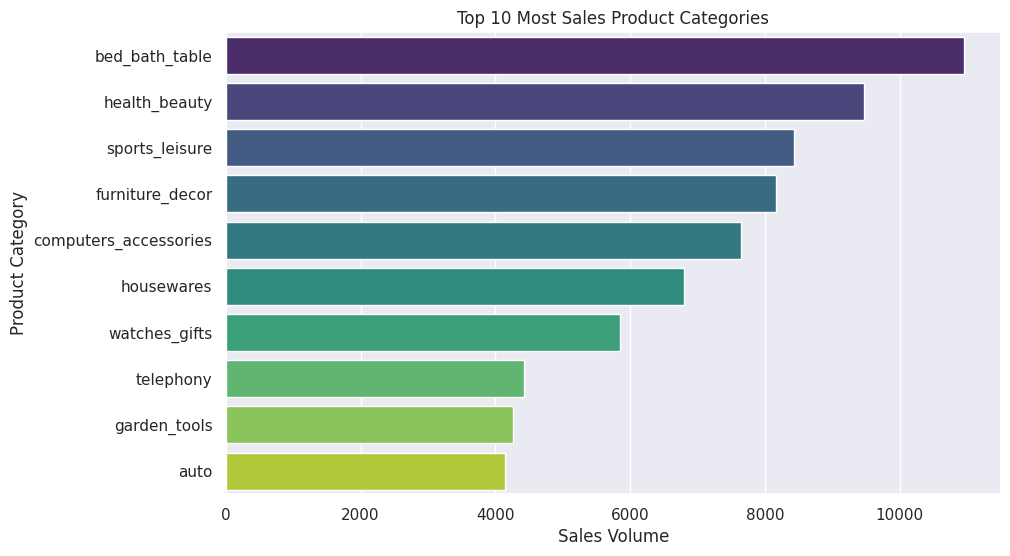

<ipython-input-220-0b2aa261f63c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_comparison, x='price_category', y='profit', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


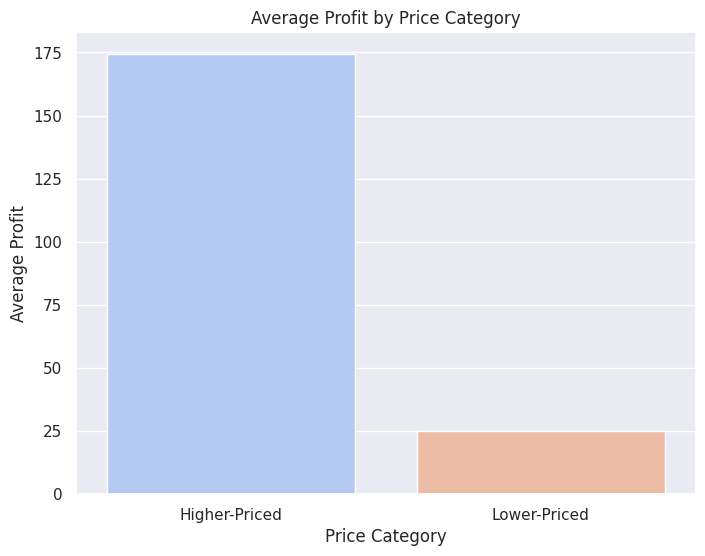

The product category with the highest sales volume is: bed_bath_table with 10953 sales.
  price_category      profit
0  Higher-Priced  174.285032
1   Lower-Priced   25.135569


In [220]:
def combine(field, via, primary, arrow):
    return field.merge(via, on=primary, how=arrow)

Product_list = combine(data['items'], data['products'], 'product_id', 'inner')
Order_list = combine(data['orders'], Product_list, 'order_id', 'inner')
Order_list = combine(Order_list, data['category'], 'product_category_name', 'left')

category_sales = Order_list.groupby('product_category_name_english')['order_item_id'].count().reset_index()
category_sales = category_sales.rename(columns={'order_item_id': 'sales_volume'})
category_sales = category_sales.sort_values(by='sales_volume', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales.head(10), x='sales_volume', y='product_category_name_english', palette='viridis')
plt.title('Top 10 Most Sales Product Categories')
plt.xlabel('Sales Volume')
plt.ylabel('Product Category')
plt.show()

Order_list['profit'] = Order_list['price'] - Order_list['freight_value']

median_price = Order_list['price'].median()
Order_list['price_category'] = Order_list['price'].apply(lambda x: 'Lower-Priced' if x < median_price else 'Higher-Priced')

profit_comparison = Order_list.groupby('price_category')['profit'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=profit_comparison, x='price_category', y='profit', palette='coolwarm')
plt.title('Average Profit by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Profit')
plt.show()

top_category = category_sales.iloc[0]
print(f"The product category with the highest sales volume is: {top_category['product_category_name_english']} with {top_category['sales_volume']} sales.")

print(profit_comparison)


### Question 2: What is the average customer expenditure? Does this average vary by geographical location?

<ipython-input-218-1842d7762d95>:15: FutureWarning: The provided callable <function mean at 0x7fd51791c280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  regions = bill.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})
<ipython-input-218-1842d7762d95>:15: FutureWarning: The provided callable <function std at 0x7fd51791c3a0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  regions = bill.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})


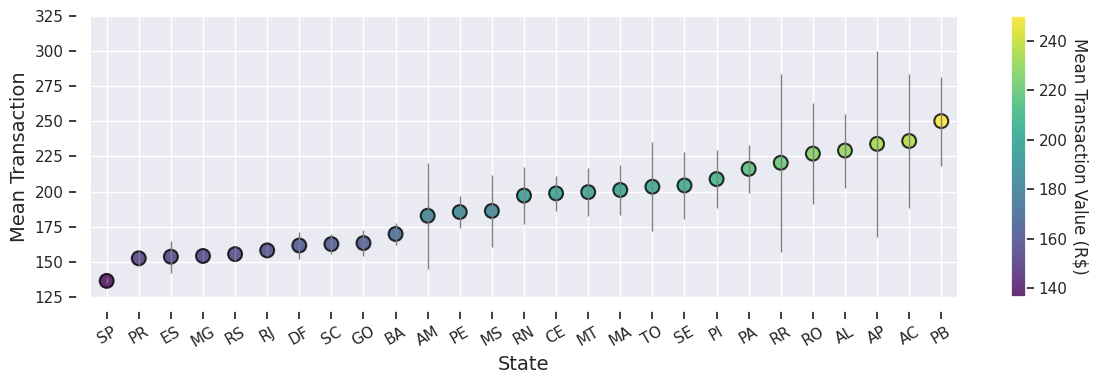

In [218]:
def join(field,via1,primary,via2,forgein):
  return field.merge(via1, on=primary, how='outer').merge(via2, on=forgein, how='outer')

def sorting(field,via,primary,forgein):
  return field.groupby([via]).agg({primary: 'sum'}).sort_values(by=forgein, ascending=False)

bill = join(orders,payments,'order_id',customers,'customer_id')
custspend = sorting(bill,'customer_unique_id','payment_value','payment_value')

mean = custspend['payment_value'].mean()
std = stats.sem(custspend['payment_value'])

stats.t.interval(0.95, loc=mean, scale=std, df=len(custspend)- 1)

regions = bill.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})
regions.reset_index(inplace=True)

cis = stats.t.interval(.95, loc=regions['payment_value']['mean'], scale=regions['payment_value']['std']/np.sqrt(regions['customer_unique_id']['count']), df=regions['customer_unique_id']['count'] -1)

regions['ci_low'] = cis[0]
regions['ci_hi'] = cis[1]

sns.set_theme(style="darkgrid")

def default_plot(ax, spines):
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')

    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))

    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')

    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')

    return ax

plot = regions.sort_values(by=('payment_value', 'mean'))

fig, ax = plt.subplots(figsize=(12, 4))
ax = default_plot(ax, ['left', 'bottom'])
plt.xticks(rotation=30)
plt.xlabel('State', fontsize=14)
plt.ylabel('Mean Transaction', fontsize=14)
plt.xlim(-0.5, len(plot) - 0.5)
plt.ylim(125, 325)


scatter = plt.scatter(
    plot['customer_state'],
    plot['payment_value']['mean'],
    s=100,
    c=plot['payment_value']['mean'],
    cmap='viridis',
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)

plt.vlines(plot['customer_state'], plot['ci_low'], plot['ci_hi'], lw=1, color='gray')

cb = plt.colorbar(scatter)
cb.set_label('Mean Transaction Value (R$)', rotation=270, labelpad=15)

plt.tight_layout()
plt.savefig('Dashboard/CustomerRegional.png', dpi=300)

plt.show()

**Insight:**
-  higher-priced products overall
- South and North Area

## Conclusion

- Which product category has the highest sales volume? Do companies earn more profit from lower-priced or higher-priced products?
      
>From the visualizations, we can see that although bed_bath_table has the highest sales volume, companies generate more profit from higher-priced products overall, regardless of their sales volume. This suggests that focusing on higher-priced items may yield greater profitability for companies.

- What is the average customer expenditure? Does this average vary by geographical location?

>From the visualization, we can see that the southern region has a lower average purchase, while the northern region shows a higher average purchase. This suggests that geographical location plays an important role in influencing customer spending patterns.

